In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
datos = pd.read_csv('icfes_bogota.csv', sep = ',', low_memory=False)

In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\Andrés Dardex\AppData\Local\Temp\ipykernel_2500\497376691.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [132]:
columnas = {'ESTU_GENERACION-E',
            'COLE_MCPIO_UBICACION', 
            'COLE_DEPTO_UBICACION',
            'ESTU_MCPIO_PRESENTACION', 
            'ESTU_DEPTO_PRESENTACION',
            'ESTU_TIPOREMUNERACION',
            'ESTU_NACIONALIDAD',
            'ESTU_PAIS_RESIDE',
            'ESTU_DEPTO_RESIDE',
            'ESTU_MCPIO_RESIDE',
            'FAMI_ESTRATOVIVIENDA',
            'FAMI_TRABAJOLABORPADRE',
            'FAMI_TRABAJOLABORMADRE',
            'FAMI_TIENELAVADORA',
            'FAMI_NUMLIBROS',
            'FAMI_SITUACIONECONOMICA'}
datos.drop(columnas, axis=1, inplace=True)

In [133]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
le = LabelEncoder()

#Aplicar el LabelEncoder a la columna 'Categoria' del DataFrame
datos['Cate_Num_FamiHogar'] = le.fit_transform(datos['FAMI_PERSONASHOGAR'])
datos['FAMI_COMELECHEDERIVADOS'] = le.fit_transform(datos['FAMI_COMELECHEDERIVADOS'])
datos['FAMI_COMECEREALFRUTOSLEGUMBRE'] = le.fit_transform(datos['FAMI_COMECEREALFRUTOSLEGUMBRE'])
datos['ESTU_DEDICACIONLECTURADIARIA'] = le.fit_transform(datos['ESTU_DEDICACIONLECTURADIARIA'])
datos['ESTU_DEDICACIONINTERNET'] = le.fit_transform(datos['ESTU_DEDICACIONINTERNET'])
datos['COLE_CARACTER'] = le.fit_transform(datos['COLE_CARACTER'])
datos['COLE_JORNADA'] = le.fit_transform(datos['COLE_JORNADA'])
datos['COLE_AREA_UBICACION'] = le.fit_transform(datos['COLE_AREA_UBICACION'])
datos['FAMI_PERSONASHOGAR'] = le.fit_transform(datos['FAMI_PERSONASHOGAR'])
datos['FAMI_COMECARNEPESCADOHUEVO'] = le.fit_transform(datos['FAMI_COMECARNEPESCADOHUEVO'])
datos['ESTU_HORASSEMANATRABAJA'] = le.fit_transform(datos['ESTU_HORASSEMANATRABAJA'])
datos['FAMI_EDUCACIONPADRE'] = le.fit_transform(datos['FAMI_EDUCACIONPADRE'])
datos['FAMI_EDUCACIONMADRE'] = le.fit_transform(datos['FAMI_EDUCACIONMADRE'])

datos.replace({'No' : 0, 'Si' : 1}, inplace=True)

In [134]:
datos.head()

,ESTU_GENERO,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_INDIVIDUAL,EDAD,RESULTADO,Cate_Num_FamiHogar
0,Masculino,4,3,10,10,1,1,1,1,1,0,0,3,1,0,2,2,3,NO OFICIAL,0,1,0,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,A2,299,83,3,15.0,3,4
1,Masculino,1,2,7,8,0,0,1,0,0,0,0,3,3,1,0,2,4,OFICIAL,0,1,1,62,81,3,54,60,3,61,87,3,73,99,4,53.0,67,A1,309,88,2,16.0,3,1
2,Masculino,1,4,8,9,1,1,1,1,0,0,0,3,2,3,4,3,4,OFICIAL,3,1,1,63,85,3,57,70,3,55,74,2,57,79,3,52.0,63,A1,288,78,3,17.0,3,1
3,Masculino,1,3,4,4,1,1,1,1,1,1,1,3,3,3,2,2,0,NO OFICIAL,0,1,1,64,86,3,56,65,3,59,82,3,60,86,3,68.0,93,B1,302,85,4,17.0,3,1
4,Masculino,1,2,8,5,1,1,1,1,1,0,1,3,3,3,4,1,0,NO OFICIAL,0,1,0,52,50,3,66,90,3,54,69,2,52,67,2,58.0,78,A2,281,74,4,15.0,2,1


In [135]:
import seaborn as sns 
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(25, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr,  vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

In [136]:
datos.corr()

,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_INDIVIDUAL,EDAD,RESULTADO,Cate_Num_FamiHogar
FAMI_PERSONASHOGAR,1.000000,0.580960,0.074209,0.083922,0.019331,0.010999,-0.015899,-0.017255,-0.004365,0.103026,0.014867,-0.031742,-0.036228,-0.015447,0.003299,-0.010447,0.021700,0.010001,0.026711,0.088777,-0.101163,-0.099162,-0.093056,-0.086153,-0.084179,-0.075529,-0.099219,-0.096044,-0.092321,-0.110420,-0.107413,-0.103197,-0.123960,-0.114836,-0.113736,-0.109348,-0.084420,-0.005051,-0.101838,1.000000
FAMI_CUARTOSHOGAR,0.580960,1.000000,0.001399,-0.018341,0.136693,0.082497,0.128157,0.119776,0.144700,0.121573,0.142056,0.055180,0.055378,0.037624,0.000578,0.013185,-0.013849,-0.008654,0.006171,-0.033739,-0.012478,-0.011849,-0.013504,-0.002285,-0.003044,0.000531,-0.005763,-0.005306,-0.004755,-0.017627,-0.017928,-0.014257,0.016859,0.021298,-0.008200,-0.007484,0.139650,-0.043015,-0.006708,0.580960
FAMI_EDUCACIONPADRE,0.074209,0.001399,1.000000,0.364074,-0.051644,-0.037469,-0.075271,-0.109195,-0.167066,0.064972,-0.124481,-0.097460,-0.090919,-0.062905,-0.014007,-0.023551,0.060265,0.053403,0.076378,0.161844,-0.158946,-0.150868,-0.148595,-0.160471,-0.145791,-0.134846,-0.174476,-0.154165,-0.159637,-0.171714,-0.156094,-0.162509,-0.229645,-0.188747,-0.192783,-0.168807,-0.302192,-0.008305,-0.147715,0.074209
FAMI_EDUCACIONMADRE,0.083922,-0.018341,0.364074,1.000000,-0.089278,-0.057160,-0.115859,-0.148550,-0.222138,0.043694,-0.159905,-0.119238,-0.115996,-0.079013,-0.016746,-0.024727,0.061494,0.057827,0.082386,0.203679,-0.179666,-0.170551,-0.166469,-0.187942,-0.173726,-0.157741,-0.199348,-0.178979,-0.182830,-0.188290,-0.172525,-0.177131,-0.263117,-0.224004,-0.218864,-0.194778,-0.365841,0.004946,-0.172552,0.083922
FAMI_TIENEINTERNET,0.019331,0.136693,-0.051644,-0.089278,1.000000,0.239436,0.449290,0.212365,0.185648,0.060062,0.182507,0.149910,0.155504,0.063373,0.007294,0.050690,-0.095622,-0.000733,0.001192,-0.132531,0.145496,0.145785,0.131345,0.148577,0.148837,0.134040,0.155626,0.155909,0.145603,0.142894,0.142448,0.134254,0.199280,0.203487,0.170778,0.171262,0.462198,-0.085422,0.163534,0.019331
FAMI_TIENESERVICIOTV,0.010999,0.082497,-0.037469,-0.057160,0.239436,1.000000,0.175607,0.171471,0.146336,0.047211,0.145749,0.113726,0.132414,0.049114,0.007577,0.021647,-0.059297,-0.006290,-0.007915,-0.088925,0.062357,0.060967,0.057408,0.065596,0.063966,0.059681,0.069964,0.069541,0.067878,0.056897,0.056359,0.053574,0.105160,0.103717,0.075229,0.073541,0.302276,-0.072982,0.069044,0.010999
FAMI_TIENECOMPUTADOR,-0.015899,0.128157,-0.075271,-0.115859,0.449290,0.175607,1.000000,0.255021,0.240029,0.072173,0.227032,0.184066,0.183933,0.083934,0.015119,0.051470,-0.109066,-0.007998,-0.022016,-0.166553,0.183382,0.182813,0.165441,0.198408,0.197350,0.176060,0.203798,0.201993,0.188209,0.180767,0.178085,0.169130,0.251304,0.255383,0.220211,0.218954,0.526479,-0.105255,0.207835,-0.015899
FAMI_TIENEHORNOMICROOGAS,-0.017255,0.119776,-0.109195,-0.148550,0.212365,0.171471,0.255021,1.000000,0.274040,0.064065,0.272517,0.198465,0.203930,0.102846,0.023469,0.055585,-0.085244,-0.034653,-0.037286,-0.177318,0.161569,0.158295,0.147474,0.171027,0.165453,0.148780,0.176662,0.169061,0.161806,0.153310,0.145657,0.145591,0.246869,0.235414,0.193231,0.183631,0.472720,-0.088650,0.168025,-0.017255
F

In [137]:
for dato in datos.corr():
    print(dato)

FAMI_PERSONASHOGAR
FAMI_CUARTOSHOGAR
FAMI_EDUCACIONPADRE
FAMI_EDUCACIONMADRE
FAMI_TIENEINTERNET
FAMI_TIENESERVICIOTV
FAMI_TIENECOMPUTADOR
FAMI_TIENEHORNOMICROOGAS
FAMI_TIENEAUTOMOVIL
FAMI_TIENEMOTOCICLETA
FAMI_TIENECONSOLAVIDEOJUEGOS
FAMI_COMELECHEDERIVADOS
FAMI_COMECARNEPESCADOHUEVO
FAMI_COMECEREALFRUTOSLEGUMBRE
ESTU_DEDICACIONLECTURADIARIA
ESTU_DEDICACIONINTERNET
ESTU_HORASSEMANATRABAJA
COLE_CARACTER
COLE_AREA_UBICACION
COLE_JORNADA
PUNT_LECTURA_CRITICA
PERCENTIL_LECTURA_CRITICA
DESEMP_LECTURA_CRITICA
PUNT_MATEMATICAS
PERCENTIL_MATEMATICAS
DESEMP_MATEMATICAS
PUNT_C_NATURALES
PERCENTIL_C_NATURALES
DESEMP_C_NATURALES
PUNT_SOCIALES_CIUDADANAS
PERCENTIL_SOCIALES_CIUDADANAS
DESEMP_SOCIALES_CIUDADANAS
PUNT_INGLES
PERCENTIL_INGLES
PUNT_GLOBAL
PERCENTIL_GLOBAL
ESTU_NSE_INDIVIDUAL
EDAD
RESULTADO
Cate_Num_FamiHogar


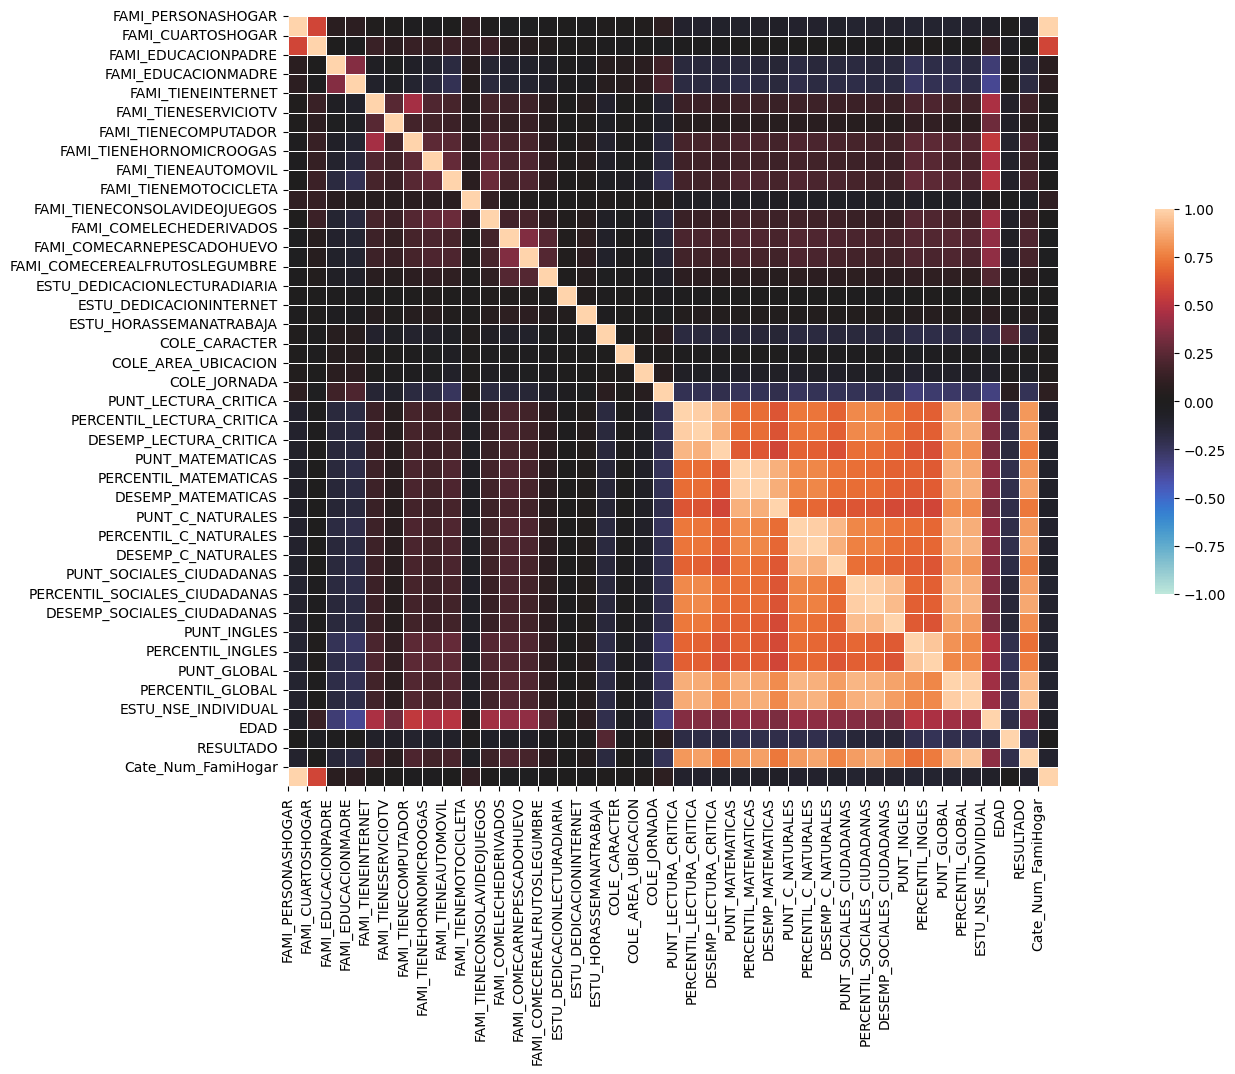

In [138]:
heatMap(datos)

In [139]:
import pandas as pd

# Supongamos que tienes una matriz de correlación en 'datos'
# Puedes crear un DataFrame de pandas a partir de ella

dato = pd.DataFrame(datos.corr())
lista_correlaciones = []

for columna in dato.columns:
    for indice in dato.index:
        correlacion = dato.loc[indice, columna]
        if correlacion > 0.25 or correlacion < -0.25:
            lista_correlaciones.append((indice, columna, correlacion))

nuevos_datos = pd.DataFrame(lista_correlaciones, columns=['Variable 1', 'Variable 2', 'Correlación'])

print(nuevos_datos)



              Variable 1          Variable 2  Correlación
0    FAMI_PERSONASHOGAR   FAMI_PERSONASHOGAR  1.000000   
1    FAMI_CUARTOSHOGAR    FAMI_PERSONASHOGAR  0.580960   
2    Cate_Num_FamiHogar   FAMI_PERSONASHOGAR  1.000000   
3    FAMI_PERSONASHOGAR   FAMI_CUARTOSHOGAR   0.580960   
4    FAMI_CUARTOSHOGAR    FAMI_CUARTOSHOGAR   1.000000   
..                 ...                  ...        ...   
401  ESTU_NSE_INDIVIDUAL  RESULTADO           0.382947   
402  RESULTADO            RESULTADO           1.000000   
403  FAMI_PERSONASHOGAR   Cate_Num_FamiHogar  1.000000   
404  FAMI_CUARTOSHOGAR    Cate_Num_FamiHogar  0.580960   
405  Cate_Num_FamiHogar   Cate_Num_FamiHogar  1.000000   

[406 rows x 3 columns]


In [140]:
columna_deseada = nuevos_datos['Variable 1']

for valor in columna_deseada:
    if valor != valor:
        print(columna_deseada)

In [141]:
columna_deseada.unique()

array(['FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'Cate_Num_FamiHogar',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_NSE_INDIVIDUAL', 'PUNT_INGLES', 'FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENEHORNOMICROOGAS', 'PERCENTIL_INGLES',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET',
       'ESTU_HORASSEMANATRABAJA', 'COLE_CARACTER', 'COLE_AREA_UBICACION',
       'COLE_JORNADA', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA',
       'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
       'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES',
       'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',


In [142]:

from sklearn.model_selection import train_test_split


In [143]:
datos.groupby('RESULTADO').get_group(1).head()

,ESTU_GENERO,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_INDIVIDUAL,EDAD,RESULTADO,Cate_Num_FamiHogar
6,Masculino,1,2,10,8,1,1,1,0,0,0,1,1,1,0,0,1,0,OFICIAL,0,1,1,57,67,3,51,50,3,45,42,2,38,29,1,56.0,74,A1,242,49,3,16.0,1,1
8,Masculino,1,2,8,8,1,1,1,1,1,0,0,1,0,1,0,2,0,NO OFICIAL,2,1,0,53,54,3,48,43,2,43,32,2,46,54,2,46.0,46,A-,237,45,3,17.0,1,1
19,Femenino,4,6,8,8,1,1,1,1,1,0,1,0,3,2,0,3,0,NO OFICIAL,0,1,0,58,69,3,31,6,1,34,10,1,44,45,2,61.0,85,A2,216,31,3,16.0,1,4
21,Masculino,3,2,7,6,0,0,1,1,0,0,0,1,1,1,0,4,3,OFICIAL,0,1,1,51,46,3,44,31,2,32,6,1,46,52,2,37.0,20,A-,214,29,2,18.0,1,3
29,Masculino,3,4,7,9,1,0,1,1,0,0,0,3,1,0,2,0,0,OFICIAL,0,1,1,53,52,3,45,32,2,48,50,2,43,45,2,42.0,32,A-,234,43,2,16.0,1,3


In [162]:
columnas = ['FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_NSE_INDIVIDUAL',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'COLE_CARACTER',
 'COLE_AREA_UBICACION',
 'COLE_JORNADA',
 'EDAD']

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define tus características y etiquetas
X = datos[columnas]
datos['RESULTADO'] = pd.cut(datos['PUNT_GLOBAL'], bins=4, labels=['1', '2', '3', '4'])
y = datos['RESULTADO']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea y entrena tu modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Haz predicciones con tu modelo
y_pred = model.predict(X_test)

# Evalúa tu modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')


Precisión: 0.557809803647218


In [165]:
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

In [150]:
datos[datos['RESULTADO'] == '4']['PUNT_GLOBAL'].max()

416

In [151]:
max_punt_global = datos[datos['RESULTADO'] == '3']['PUNT_GLOBAL'].max()
print(max_punt_global)

344


In [152]:
datos.head(1060)

,ESTU_GENERO,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_INDIVIDUAL,EDAD,RESULTADO,Cate_Num_FamiHogar
0,Masculino,4,3,10,10,1,1,1,1,1,0,0,3,1,0,2,2,3,NO OFICIAL,0,1,0,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,A2,299,83,3,15.0,3,4
1,Masculino,1,2,7,8,0,0,1,0,0,0,0,3,3,1,0,2,4,OFICIAL,0,1,1,62,81,3,54,60,3,61,87,3,73,99,4,53.0,67,A1,309,88,2,16.0,3,1
2,Masculino,1,4,8,9,1,1,1,1,0,0,0,3,2,3,4,3,4,OFICIAL,3,1,1,63,85,3,57,70,3,55,74,2,57,79,3,52.0,63,A1,288,78,3,17.0,3,1
3,Masculino,1,3,4,4,1,1,1,1,1,1,1,3,3,3,2,2,0,NO OFICIAL,0,1,1,64,86,3,56,65,3,59,82,3,60,86,3,68.0,93,B1,302,85,4,17.0,3,1
4,Masculino,1,2,8,5,1,1,1,1,1,0,1,3,3,3,4,1,0,NO OFICIAL,0,1,0,52,50,3,66,90,3,54,69,2,52,67,2,58.0,78,A2,281,74,4,15.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Femenino,1,2,9,7,1,0,1,1,0,1,1,0,0,0,0,0,0,OFICIAL,0,1,4,43,20,2,37,14,2,42,31,2,35,20,1,38.0,23,A-,196,18,2,16.0,1,1
1056,Femenino,1,2,9,9,1,1,1,0,0,1,0,1,3,1,2,2,0,OFICIAL,3,1,4,53,54,3,53,58,3,55,72,2,53,70,2,53.0,66,A1,267,66,3,15.0,2,1
1057,Femenino,4,5,0,0,1,0,1,0,0,0,1,1,3,3,0,2,0,NO OFICIAL,0,1,0,57,66,3,53,57,3,45,42,2,56,77,3,43.0,37,A-,260,61,3,17.0,2,4
1058,Femenino,2,2,8,1,1,1,1,1,0,0,1,0,1,3,0,1,2,OFICIAL,3,1,3,42,18,2,43,27,2,35,11,1,26,3,1,28.0,4,A-,179,10,3,18.0,1,2


In [153]:
X_test.head(5)

,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_NSE_INDIVIDUAL,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENESERVICIOTV,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEMOTOCICLETA,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PERCENTIL_GLOBAL,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,EDAD
27143,1,2,7,7,3,1,1,1,0,1,0,0,1,1,2,2,2,3,0,1,0,71,52,56,3,53,59,3,15.0
5752,1,3,8,8,3,1,1,1,0,0,0,0,3,1,1,4,1,0,0,1,1,90,87,64,3,88,65,3,16.0
40770,0,2,8,11,3,1,1,1,1,0,1,0,3,3,3,0,1,0,0,1,0,76,92,56,3,69,53,2,15.0
57682,3,6,6,6,3,1,1,1,1,1,1,1,0,0,0,2,0,3,0,1,1,8,6,45,2,19,22,1,17.0
1059,4,6,7,7,3,1,1,1,1,0,1,0,3,3,3,0,0,0,0,1,5,52,34,52,3,61,44,2,16.0


In [154]:
model.predict(X_test.head(5))

array([2, 3, 3, 0, 2], dtype=int64)